In [1]:
!pip install pandas


In [2]:
import pandas as pd

# ***Import dataset***

In [3]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving heart.csv to heart.csv


In [4]:
data = pd.read_csv('heart.csv')

# ***Handle missing values***

In [5]:
data.isnull().sum() #if there's any values are missing or not

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# ***Handle Duplicate Values***

In [6]:
data_dup = data.duplicated().any() #check duplicate values

In [7]:
data_dup #dataset contains some duplicate values

True

In [8]:
data = data.drop_duplicates()

In [9]:
data_dup = data.duplicated().any() #drop duplicates values

In [10]:
data_dup

False

# ***Data Processing***

In [11]:
cate_val = []   #categorical columns
cont_val = []   #numerical columns
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)    #if less than 20 then particular columns are categorical columns
    else:
        cont_val.append(column)   #otherwise continuous columns

In [12]:
cate_val   #all the categorical columns

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
cont_val  #all the continuous columns

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# ***Encoding Categorical Data***

In [14]:
data['cp'].unique()   #how many unique datas

array([0, 1, 2, 3])

In [15]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val, drop_first=True)

In [16]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# ***Feature Scaling***

In [17]:
from sklearn.preprocessing import StandardScaler #for feature scaling

In [18]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val]) #data & numerical colum

In [19]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# ***Splitting the dataset into the training Set & test set***

In [20]:
X = data.drop('target', axis=1)

In [21]:
X  #independent variable

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [22]:
y = data['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state = 45)

In [25]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
304,-0.267966,0,0.250786,-0.977399,0.849769,-0.813302,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
616,-1.264315,1,-0.946867,1.093526,1.374576,0.135360,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
26,-1.153610,1,-0.091401,-0.261285,1.287108,-0.554576,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
8,-0.932199,1,-0.661712,0.048386,-0.243577,-0.209608,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
49,0.617678,1,-0.832805,-0.319348,0.456164,0.307844,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,-0.600082,1,-0.091401,0.377412,0.937237,-0.382092,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
320,-0.157260,0,-0.091401,0.338703,-0.287311,-0.554576,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
109,-0.046555,1,-1.232023,-0.783855,-1.817996,-0.899544,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
34,-0.489377,1,-0.148432,-0.977399,0.587366,-0.899544,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [26]:
y_test

216    0
114    0
91     1
139    1
171    0
      ..
349    0
269    1
141    0
328    0
148    1
Name: target, Length: 61, dtype: int64

In [27]:
y_train

304    1
616    1
26     1
8      0
49     0
      ..
215    1
320    1
109    0
34     1
161    1
Name: target, Length: 241, dtype: int64

In [28]:
y_test

216    0
114    0
91     1
139    1
171    0
      ..
349    0
269    1
141    0
328    0
148    1
Name: target, Length: 61, dtype: int64

# **Algorithms**

# ***Logistic Regression***

In [29]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log = LogisticRegression()
log.fit(X_train, y_train)  #train logistic regression

LogisticRegression()

In [32]:
y_pred1 = log.predict(X_test)  #different prediction

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test, y_pred1)   #accuracy rate

0.8524590163934426

85% Accuracy

# ***SVC (Support Vector Classifier)***

In [35]:
from sklearn import svm

In [36]:
svm = svm.SVC()

In [37]:
svm.fit(X_train, y_train)

SVC()

In [38]:
y_pred2 = svm.predict(X_test)  #new predicted value

In [39]:
accuracy_score(y_test, y_pred2)

0.819672131147541

82% Accuracy


# ***K-nearest Neighbors Classifier***

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier()  #ctreate instance

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
y_pred3 = knn.predict(X_test) #prediction on unseen samples

In [44]:
accuracy_score(y_test,y_pred3)

0.8360655737704918

84% Accuracy

In [45]:
score = []

for i in range(1, 45):
    knn=KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))

In [46]:
score

[0.7213114754098361,
 0.819672131147541,
 0.7868852459016393,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7540983606557377,
 0.8032786885245902,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7868852459016393,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.8032786885245902,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.8360655737704918,
 0.819672131147541,
 0.8360655737704918,
 0.8360655737704918,
 0.819672131147541,
 0.8360655737704918,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541]

In [47]:
import matplotlib.pyplot as plt

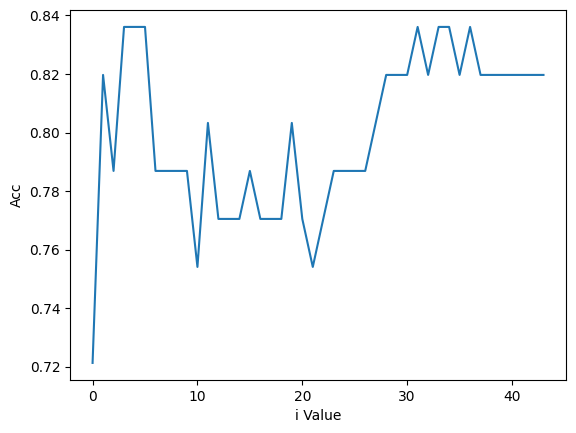

In [48]:
plt.plot(score)
plt.xlabel("i Value")
plt.ylabel("Acc")
plt.show()

In [49]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.819672131147541

82% Accuracy

### Non-Linear ML Algorithms

In [50]:
data = pd.read_csv('heart.csv')

In [51]:
data = data.drop_duplicates()  #remove duplicates values

In [52]:
data.shape

(302, 14)

In [53]:
X = data.drop('target', axis=1)
y = data['target']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 45)

# ***Decision Tree Classifier***

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dt = DecisionTreeClassifier()

In [58]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
y_pred4 = dt.predict(X_test)

In [60]:
accuracy_score(y_test, y_pred4)

0.7049180327868853

70% accuracy

# ***Random Forest Classifier***

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf = RandomForestClassifier()  #instance od classifier

In [63]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
y_pred5 = rf.predict(X_test) #predicted on unseen

In [65]:
accuracy_score(y_test, y_pred5)

0.8360655737704918

84% Accuracy

# ***Gradient Boosting Classifier***

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
gbc = GradientBoostingClassifier()

In [68]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [69]:
y_pred6 = gbc.predict(X_test)

In [70]:
accuracy_score(y_test, y_pred6)

0.7377049180327869

74% Accuracy

# ***Naive Bayes Classifier***

In [91]:
from sklearn.naive_bayes import GaussianNB

In [92]:
nv = GaussianNB()

In [93]:
nv.fit(X_train, y_train)

GaussianNB()

In [94]:
y_pred7 = nv.predict(X_test)

In [96]:
accuracy_score(y_test, y_pred7)

0.8360655737704918

84% Accuracy

# ***Final Data of all Algorithms***

In [100]:
final_data = pd.DataFrame({
    'Models': ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB', 'NB'],
    'ACC': [
        accuracy_score(y_test, y_pred1) * 100,
        accuracy_score(y_test, y_pred2) * 100,
        accuracy_score(y_test, y_pred3) * 100,
        accuracy_score(y_test, y_pred4) * 100,
        accuracy_score(y_test, y_pred5) * 100,
        accuracy_score(y_test, y_pred6) * 100,
        accuracy_score(y_test, y_pred7) * 100
    ]
})

In [101]:
final_data

,Models,ACC
0,LR,85.245902
1,SVM,81.967213
2,KNN,83.606557
3,DT,70.491803
4,RF,83.606557
5,GB,73.770492
6,NB,83.606557


In [102]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

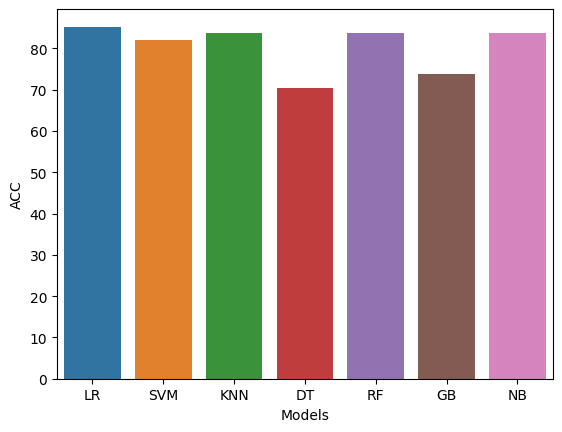

In [104]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

# **Best Model: Logistic Regression**

**Let's train Logistic Regression (85% Accuracy) on our entire dataset**

In [106]:
X = data.drop('target', axis=1)
y = data['target']

In [107]:
X.shape

(302, 13)

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
log = LogisticRegression()
log.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# ***Prediction on New Data***

In [110]:
import pandas as pd

In [112]:
new_data = pd.DataFrame (
  {
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
  },
     index=[0])

In [113]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [115]:
p = log.predict(new_data)  #pass dataframe
if p[0] == 0:
    print("No Disease")
else:
    print("Disease")

No Disease


# ***Save Model Using Joblib***

In [116]:
import joblib

In [118]:
joblib.dump(rf, 'model_joblib_heart')

['model_joblib_heart']

In [119]:
model = joblib.load('model_joblib_heart')

In [120]:
model.predict(new_data)  #using this model perform predict

array([0])

In [121]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### GUI

In [122]:
from tkinter import *
import joblib

In [134]:
import joblib
import numpy as np
from sklearn import *
import ipywidgets as widgets
from IPython.display import display

def show_entry_fields(b):
    p1 = int(n1.value)
    p2 = int(n2.value)
    p3 = int(n3.value)
    p4 = int(n4.value)
    p5 = int(n5.value)
    p6 = int(n6.value)
    p7 = int(n7.value)
    p8 = int(n8.value)
    p9 = int(n9.value)
    p10 = float(n10.value)
    p11 = int(n11.value)
    p12 = int(n12.value)
    p13 = int(n13.value)

    model = joblib.load('model_joblib_heart')
    result = model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])

    if result == 0:
        result_label.value = "No Heart Disease"
    else:
        result_label.value = "Possibility of Heart Disease"

n1 = widgets.IntText(description="Age: ")
n2 = widgets.IntText(description="Male/Female [1/0]: ")
n3 = widgets.IntText(description="CP: ")
n4 = widgets.IntText(description="trestbps: ")
n5 = widgets.IntText(description="chol: ")
n6 = widgets.IntText(description="fbs: ")
n7 = widgets.IntText(description="restecg: ")
n8 = widgets.IntText(description="thalach: ")
n9 = widgets.IntText(description="exang: ")
n10 = widgets.FloatText(description="oldpeak: ")
n11 = widgets.IntText(description="slope: ")
n12 = widgets.IntText(description="ca: ")
n13 = widgets.IntText(description="thal: ")

predict_button = widgets.Button(description = "Predict")
predict_button.on_click(show_entry_fields)

result_label = widgets.Label()

display(n1, n2, n3, n4, n5, n6, n7, n8, n9, n10, n11, n12, n13, predict_button, result_label)

IntText(value=0, description='Age: ')

IntText(value=0, description='Male/Female [1/0]: ')

IntText(value=0, description='CP: ')

IntText(value=0, description='trestbps: ')

IntText(value=0, description='chol: ')

IntText(value=0, description='fbs: ')

IntText(value=0, description='restecg: ')

IntText(value=0, description='thalach: ')

IntText(value=0, description='exang: ')

FloatText(value=0.0, description='oldpeak: ')

IntText(value=0, description='slope: ')

IntText(value=0, description='ca: ')

IntText(value=0, description='thal: ')

Button(description='Predict', style=ButtonStyle())

Label(value='')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
